# Predikce hudebních žánrů - semestrální projekt 

Daniel Jírovec, Albert Mírek

Tato semestrální práce se zabývá zpracováním datasetu "Music Genre Prediction". Dataset byl získán ze stránky Kaggle.com, konkrétně na tomto odkazu: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

Tento Jupyter Notebook se skládá z několika částí:
* Popis datasetu a cíl projektu
* Předzpracování dat
* Vizualizace dat
* Tvorba modelů
* Výsledky a evaluace

## Popis datasetu a cíl projektu

Data byla původně shromážděna pomocí Spotify API. Dataset obsahuje informace o jednotlivých hudebních skladbách. Má celkem 18 atributů, z čehož 17 popisuje unikátní vlastnosti každé skladby a poslední atribut, cílový, udává hudební žánr skladby. Cílový atribut může nabývat 10 hodnot (10 žánrů). Dataset má celkem 50 000 instancí, na každou kategorii cílového atributu připadá 5 000 instancí.

Cílem tohoto semestrálního projektu je pomocí metod strojového učení a příslušných modelů provést klasifikační úlohu a jednotlivé instance skladeb na základě atributů klasifikovat do příslušného hudebního žánru.

### Atributy instancí datasetu

* *instance_id*: číslo instance


* *artist_name*: jméno umělce


* *track_name*: jméno skladby


* *popularity*: popularita skladby; čím větší číslo, tím je skladba populárnější


* *acousticness*: míra spolehlivosti měřena od 0.0 do 1.0, zda je skladba akustická; 1.0 představuje vysokou konfidenci, že skladba je akustická


* *danceability*: popisuje, jak vhodná je skladba pro tanec na základě kombinace hudebních prvků včetně tempa, stability rytmu, taktu a celkové pravidelnosti; při hodnotě 0.0 je píseň nejméně vhodná pro tanec a při hodnotě 1.0 je nejvíce vhodná


* *duration_ms*: délka trvání skladby v milisekundách


* *energy*: míra energie měřena od 0.0 do 1.0; představuje míru aktivity a intenzity skladby


* *instrumentalness*: instrumentálnost říká, v jaké míře skladba neobsahuje vokály, přičemž zvuky jako "Ooh" a "Aah" jsou v tomto konextu považovány za instrumentální; rap nebo mluvené slovo jsou jednoznačně „vokální“; čím blíže je hodnota instrumentality k 1.0, tím větší je pravděpodobnost, že skladba neobsahuje žádný vokální obsah - hodnoty nad 0.5 mají představovat instrumentální skladby, ale spolehlivost je vyšší, když se hodnota blíží 1.0


* *key*: tónina, ve které se skladba nachází; celá čísla se mapují na výšky pomocí standardní notace "Pitch Class"; např. 0 = C, 1 = C♯/D♭, 2 = D a tak dále; pokud nebyla detekována žádná tónina, hodnota je -1


* *liveness*: detekuje přítomnost publika v nahrávce; vyšší hodnoty atributu představují zvýšenou pravděpodobnost, že nahrávka byla pořízena živě s publikem; hodnota nad 0.8 znamená velkou pravděpodobnost, že je skladba hraná živě

* *loudness*: celková hlasitost skladby v decibelech (dB); hodnoty hlasitosti jsou zprůměrovány přes celou délku skladby a jsou užitečné pro porovnání relativní hlasitosti skladeb; hodnoty se obvykle pohybují mezi -50 db a 0 db


* *mode*: označuje modalitu (Major = Dur nebo Minor = Moll) skladby - typ stupnice, z níž je odvozen její melodický obsah; major je reprezentován 1 a Minor je 0


* *speechiness*: detekuje přítomnost mluveného slova ve stopě; čím více se nahrávka podobá řeči (např. talk show, audiokniha, podcast), tím se hodnota atributu blíží hodnotě 1.0; hodnoty nad 0.66 popisují stopy, které jsou pravděpodobně celé tvořeny mluveným slovem; hodnoty mezi 0.33 a 0.66 popisují stopy, které mohou obsahovat hudbu i řeč, buď v sekcích, nebo ve vrstvách, včetně případů, jako je rapová hudba; hodnoty pod 0.33 s největší pravděpodobností představují hudbu a další skladby, které neobsahují řeč


* *tempo*: celkové odhadované tempo skladby v úderech za minutu (BPM); v hudební terminologii je tempo rychlost dané skladby a odvozuje se přímo od průměrné doby trvání taktu


* *time_signature* / **obtained_date (V DATASETU JE UVEDENO OBTAINED_DATE, ALE HODNOTY NEDÁVAJÍ SMYSL, VŠECHNY JSOU DATUM ZE ZAČÁTKU DUBNA 3/4, 4/4 AŽ 5/4 -> V DATASETU BYL BLBĚ NASTAVENÝ DATOVÝ TYP SLOUPCE NA DATETIME -> VE SKUTEČNOSTI SE JEDNÁ O ATRIBUT TIME_SIGNATURE -> VYSVĚTLENÍ V POPISU ATRIBUTU)**: odhadovaný takt; označení taktu je notační konvence, která určuje, kolik dob je v každém taktu; označení taktu se pohybuje od 1 do 5 označující označení taktu "1/4", "2/4", "3/4", "4/4" a "5/4"


* *valence*: míra od 0.0 do 1.0 popisující hudební pozitivitu v dané skladbě; skladby s vysokou hodonotu zní pozitivněji (např. šťastně, vesele, euforicky), zatímco skladby s nízkou hodnotou znějí negativněji (např. smutně, depresivně, naštvaně)


* *music_genre*: hudební žánr skladby; může nabývat 10 hodnot - Electronic, Anime, Jazz, Alternative, Country, Rap, Blues, Rock, Classical a Hip-Hop 

## Předzpracování dat

In [1]:
#imports of required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#loading of dataset
df = pd.read_csv('./dataset/music_genre.csv', sep=',')

In [3]:
#exploring data
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
#looking at the shape of data
df.shape

(50005, 18)

In [5]:
#looking for missing values
df[df.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#search for '?' values and convert them to nan
df[df=='?'] = np.nan
print(df.isnull().sum())

instance_id            5
artist_name            5
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64


In [7]:
#drop all missing values
df = df.dropna()

In [8]:
#reseting index
df.reset_index(inplace = True)

In [9]:
#remove features with no significance for prediction
df = df.drop(["index", "instance_id", "track_name", "artist_name"], axis=1)

In [10]:
#data is now clean of missing values and only 15 features remains
df.shape

(45020, 15)

In [11]:
#looking at the data
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [12]:
#fixing the correctness of 'obtained_date' column
#giving column correct name
df.rename(columns = {'obtained_date':'time_signature'}, inplace = True)

In [13]:
#looking at the value counts of 'time_signature' column
df['time_signature'].value_counts()

4-Apr    40301
3-Apr     3657
5-Apr      710
1-Apr      352
Name: time_signature, dtype: int64

In [14]:
#replacing values with correct ones, 4 meaning 4/4; 3 meaning 3/3; 5 meaning 5/4 and 1 meaning 1/4
df['time_signature'] = df['time_signature'].replace('4-Apr', 4)
df['time_signature'] = df['time_signature'].replace('3-Apr', 3)
df['time_signature'] = df['time_signature'].replace('5-Apr', 5)
df['time_signature'] = df['time_signature'].replace('1-Apr', 1)

In [15]:
#looking at the value counts of 'time_signature' column after replacement of values
df['time_signature'].value_counts()

4    40301
3     3657
5      710
1      352
Name: time_signature, dtype: int64

In [16]:
#encode 'key' column with LabelEncoder()
key_encoder = LabelEncoder()
df['key'] = key_encoder.fit_transform(df['key'])
#df['key'].unique() #print encoded values

In [17]:
#encode 'mode' column with LabelEncoder()
mode_encoder = LabelEncoder()
df['mode'] = mode_encoder.fit_transform(df['mode'])
#df['mode'].unique() #print encoded values

#### Training and testing data

In [18]:
# Labels are the values we want to predict
y = df['music_genre']

#Remove the labels from the features
X = df.drop('music_genre', axis = 1)

In [19]:
#split into test and train sets (#scikit-learn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (33765, 14)
Training Labels Shape: (33765,)
Testing Features Shape: (11255, 14)
Testing Labels Shape: (11255,)


## Vizualizace dat

In [20]:
# statistics for each column
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,time_signature,valence
count,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,5.350578,0.193951,-9.137016,0.358641,0.093783,3.911084,0.456394
std,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,3.460945,0.161715,6.156400,0.479607,0.101469,0.399334,0.247161
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.000000,0.009670,-47.046000,0.000000,0.022300,1.000000,0.000000
25%,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,3.000000,0.096900,-10.860000,0.000000,0.036100,4.000000,0.257000
50%,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,5.000000,0.126000,-7.284000,0.000000,0.048900,4.000000,0.448000
75%,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,8.000000,0.244000,-5.177000,1.000000,0.098800,4.000000,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,11.000000,1.000000,3.744000,1.000000,0.942000,5.000000,0.992000


In [21]:
print(df.shape)

(45020, 15)


## Models

### Random Forest

In [22]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=25)
clf.fit(X_train, y_train)

print("Accuracy on train data", clf.score(X_train, y_train))
print("Accuracy on test data", clf.score(X_test, y_test))

Accuracy on train data 0.9726343847179032
Accuracy on test data 0.5526432696579298


### KNN

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 10)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.17734340293203021


/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Tuning KNN

/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

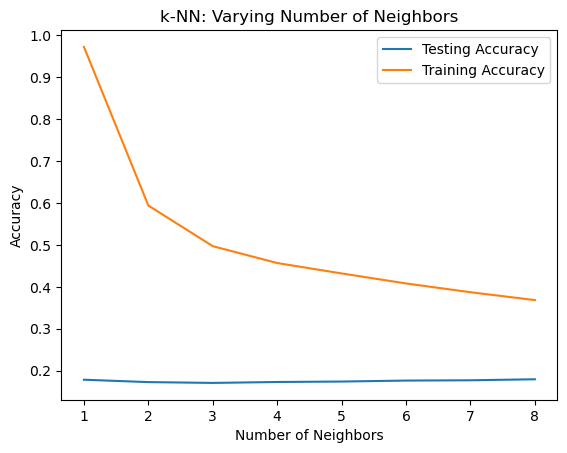

In [24]:
## TODO: předělat, vezmu si
#Tuning KNN ##
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Logistic Regression

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

y_pred = log_reg.predict(X)
accuracy_score(y_pred,y)

/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.297245668591737

##### Logistic regression w/ GridSearch

In [26]:
c_space = np.logspace(-5,8,15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

log_reg_tuned = LogisticRegression()
logreg_cv = GridSearchCV(log_reg_tuned, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.27806900636754034


/Users/albertmirek/.conda/envs/4IZ566-py-music/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Metaparameters tuning

### Preprocessing
Merge of musical genres to create [Rap&HipHop, Classical, Anime, Rock Alternative country, jazz blues and electronic]

### Random Forest tuning

### KNN tuning

### Logistic regression tunning

## Výsledky a evaluace